In [ ]:
### sample1

In [61]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.stats import entropy

# スペクトルエントロピーを計算する関数
def spectral_entropy(audio, sr, frame_size=2048, hop_size=512, n_fft=2048):
    # スペクトログラムを取得（短時間フーリエ変換）
    S = librosa.stft(audio, n_fft=n_fft, hop_length=hop_size, win_length=frame_size)
    # 振幅スペクトルを取得（複素数から絶対値へ変換）
    S_magnitude = np.abs(S)
    
    # スペクトルエントロピーをフレームごとに計算
    entropy_values = []
    for i in range(S_magnitude.shape[1]):
        # 各フレームのスペクトル成分を確率分布として解釈
        # 確率分布にするために、各振幅を正規化
        norm_S = S_magnitude[:, i] / np.sum(S_magnitude[:, i])
        # エントロピーを計算
        ent = entropy(norm_S + np.finfo(float).eps)  # ゼロ除算を防ぐための小さい定数を足す
        entropy_values.append(ent)

    return np.array(entropy_values)

# WAVファイルの読み込み
def analyze_spectral_entropy(file_path, frame_size=2048, hop_size=512, n_fft=2048):
    # 音声ファイルを読み込む
    audio, sr = librosa.load(file_path, sr=None)

    # スペクトルエントロピーを計算
    entropy_values = spectral_entropy(audio, sr, frame_size, hop_size, n_fft)

    # 時間軸の作成（フレーム数から時間を計算）
    times = librosa.frames_to_time(np.arange(len(entropy_values)), sr=sr, hop_length=hop_size)

    # 結果をプロット
    plt.figure(figsize=(10, 6))
    plt.plot(times, entropy_values, label='Spectral Entropy')
    plt.xlabel('Time (s)')
    plt.ylabel('Spectral Entropy')
    plt.title('Spectral Entropy Over Time')
    plt.grid(True)
    plt.legend()
    plt.show()

    return times, entropy_values




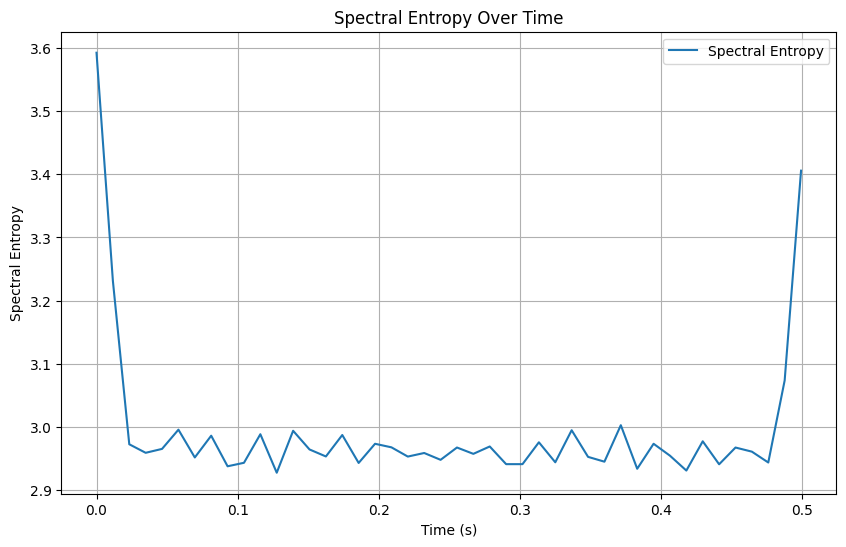

(array([0.        , 0.01160998, 0.02321995, 0.03482993, 0.04643991,
        0.05804989, 0.06965986, 0.08126984, 0.09287982, 0.1044898 ,
        0.11609977, 0.12770975, 0.13931973, 0.15092971, 0.16253968,
        0.17414966, 0.18575964, 0.19736961, 0.20897959, 0.22058957,
        0.23219955, 0.24380952, 0.2554195 , 0.26702948, 0.27863946,
        0.29024943, 0.30185941, 0.31346939, 0.32507937, 0.33668934,
        0.34829932, 0.3599093 , 0.37151927, 0.38312925, 0.39473923,
        0.40634921, 0.41795918, 0.42956916, 0.44117914, 0.45278912,
        0.46439909, 0.47600907, 0.48761905, 0.49922902]),
 array([3.592241  , 3.2312351 , 2.97290152, 2.95940246, 2.9655775 ,
        2.99598824, 2.95205019, 2.98645082, 2.93807783, 2.9436039 ,
        2.98879517, 2.9278959 , 2.99423981, 2.96469728, 2.95360855,
        2.98754817, 2.94334603, 2.97367533, 2.96806066, 2.95343916,
        2.95909826, 2.94829208, 2.96776549, 2.9577499 , 2.96939681,
        2.94145219, 2.94144497, 2.97602737, 2.94440476, 2.

In [63]:
# 実行例
file_path = 'output_chords/octave3_code_Gmaj.wav'  # ここに解析するwavファイルのパスを指定してください
analyze_spectral_entropy(file_path)

In [58]:
## sample 2

In [59]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.stats import entropy

def compute_entropy_melspectrogram(
    audio_path,
    sr=22050*2,
    n_mels=40,
    hop_length=512,
    normalize_frames=True
):
    # 音声読み込み
    y, sr = librosa.load(audio_path, sr=sr)

    # メルスペクトログラム（パワー）を計算
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length, power=2.0)

    # フレームごとに正規化してシャノンエントロピーを計算
    entropies = []
    for i in range(S.shape[1]):
        frame = S[:, i]
        if normalize_frames:
            p = frame / np.sum(frame) if np.sum(frame) > 0 else np.ones_like(frame) / len(frame)
        else:
            p = frame
        e = entropy(p, base=2)  # base=2 for bits
        entropies.append(e)

    return np.array(entropies), S, sr

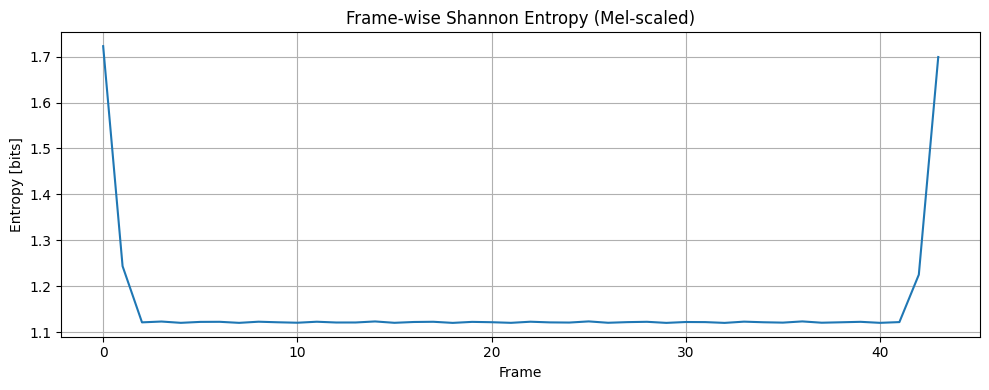

In [60]:
# 使用例
audio_path = 'output_chords/octave4_code_Gmaj.wav'
entropies, S, sr = compute_entropy_melspectrogram(audio_path)

# 可視化
plt.figure(figsize=(10, 4))
plt.plot(entropies)
plt.title("Frame-wise Shannon Entropy (Mel-scaled)")
plt.xlabel("Frame")
plt.ylabel("Entropy [bits]")
plt.grid(True)
plt.tight_layout()
plt.show()

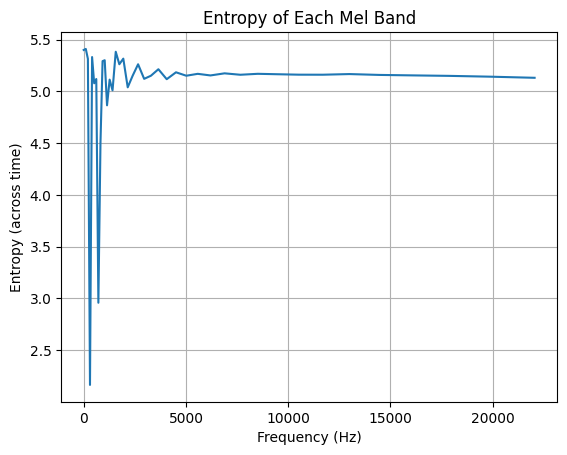

In [56]:
# 使用例
audio_path = 'output_chords/octave3_code_Gsus2.wav'
entropies, S, sr = compute_entropy_melspectrogram(audio_path)

# 各メルバンドのエネルギーを時間方向に正規化してエントロピー計算
mel_band_entropies = []
for i in range(S.shape[0]):
    band = S[i, :]
    p = band / np.sum(band) if np.sum(band) > 0 else np.ones_like(band) / len(band)
    e = entropy(p, base=2)
    mel_band_entropies.append(e)

# 可視化
import matplotlib.pyplot as plt
plt.plot(librosa.mel_frequencies(n_mels=S.shape[0], fmin=0, fmax=sr/2), mel_band_entropies)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Entropy (across time)")
plt.title("Entropy of Each Mel Band")
plt.grid(True)
plt.show()
